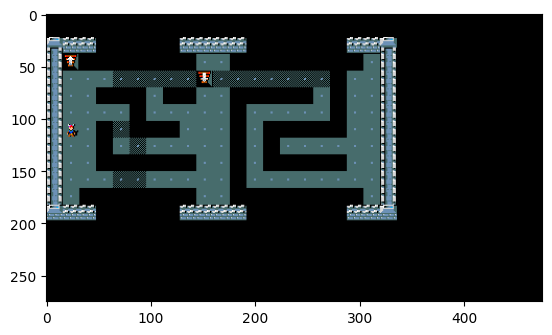

In [1]:
import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display
from geneticAlgorithm import initialize, selection, crossover, mutation
from utilsMinihackSearch import get_player_location
import time
from copy import deepcopy

moves = [0,1,2,3]
n_paths = 5
path_length = 15
paths = initialize.initialize_population(n_paths, moves, path_length)


env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
initial_state = env.reset()
env.render()

intial_state_copies = []
for i in range(len(paths)):
    intial_state_copies.append(deepcopy(initial_state))

action_map = {
    "w": 0,
    "d": 1,
    "s": 2,
    "a": 3
}

def play_game(image, path, game_map):
    print(get_player_location(game_map))
    for move in path:
        time.sleep(0.1)
        s, _, _, _ = env.step(move)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][25:300, :475])

for i in range(len(intial_state_copies)):
    initial_state = intial_state_copies[i]
    game_map = initial_state['chars']
    game = initial_state['pixel']
    image = plt.imshow(game[25:300, :475])
    play_game(image, paths[i], game_map)
    time.sleep(4)


